Code to extract features from tracks. This is based on  Velardo -The sound of AI tutorials. 

Import libraries and mount googledrive

In [ ]:
from scipy.io import wavfile
from scipy.fftpack import fft, fftfreq
from IPython.display import Audio
from matplotlib import pyplot as plt
import IPython.display as ipd
import numpy as np
import librosa 
import librosa.display
import os
import math
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Create a base that points to directory holding all audio files.

In [ ]:
#example: /content/drive/MyDrive/New_tracks/Electronic4125CMedStimV2.wav

BASE_DIR='/content/drive/MyDrive/New_tracks/'
#tracks
DopWav_file="Electronic4125CMedStimV2.wav"
Amb_file="Neurosity_Shift_Ambeint_3_125_Low ValMedEnMedStimV2.2.wav"

In [ ]:
fs, wav = wavfile.read((os.path.join(BASE_DIR, DopWav_file)))

#fs, wav = wavfile.read((os.path.join(BASE_DIR, Amb_file)))


Gives sampling rate and audiospectrum. 

44100


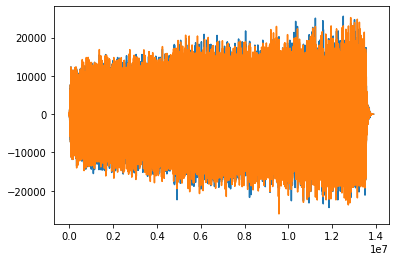

In [ ]:
print(fs)
plt.plot(wav)

Audio should play track, but runtime keeps disconnecting? 

In [ ]:
#Audio(DopWav_file,autoplay=True)

In [ ]:
#ipd.Audio(DopWav_file) #This doesn't work either, same error. 

Turn files into numpy arrays

In [ ]:
DopWav, sr = librosa.load(os.path.join(BASE_DIR, DopWav_file))

Default sample rate should be 22050

In [ ]:
sr

22050

Shape of .wav should now be an array. Shape gives number of samples.

In [ ]:
DopWav.shape

(6943104,)

Moving on to FFT

In [ ]:
DopWav_ft =np.fft.fft(DopWav) #first fft is the module that contains many versions of fft, the second is the classical version

Should be same as shape before FFT, same number of freq bins as the number of samples as orgional. 

In [ ]:
DopWav_ft.shape

(6943104,)

In [ ]:
DopWav_ft[0] #first fft coeffient, should be a complex number, holds phase and mag info. We want just mag info. 

(-186.2060558688739+0j)

In [ ]:
magnitude_spectrum_f_name =np.abs(DopWav_ft) # to just get the mag, take the absolute value

In [ ]:
#magnitude_spectrum_f_name[0] # the magnitude associated with initial frequency bin

In [ ]:
def plot_magnitude_spectrum(signal, title, sr, f_ratio=1): #f ratio changes freq rate value
  ft = np.fft.fft(signal)
  magnitude_spectrum = np.abs(ft)

 #plot magnitude spectrum
  plt.figure(figsize=(18,5))

 #take range btw 0 and sample rate, and make as many frequencey bins as len of spectrum.
  frequency = np.linspace(0, sr, len(magnitude_spectrum))
  num_frequency_bins=int(len(frequency)*f_ratio) #float cast to int

  plt.plot(frequency[:num_frequency_bins], magnitude_spectrum[:num_frequency_bins]) #split bins
  plt.xlabel('Frequency (HZ)')
  plt.ylabel('Magnitude')
  plt.title(title)

  plt.show()


Plot frequency bins

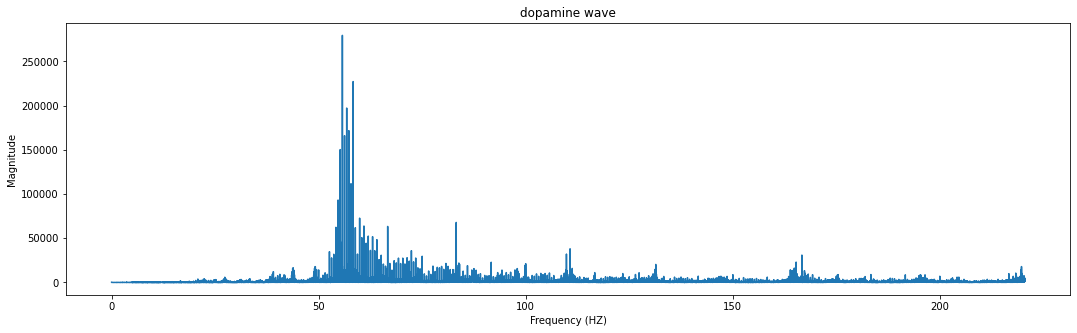

In [ ]:
plot_magnitude_spectrum(DopWav,"dopamine wave", sr, 0.01) #Change the ratio to give different scales

**Extracting Short-Time Fourier Transform**

In [ ]:
FRAME_SIZE = 2048
HOP_SIZE = 512 #window size

In [ ]:

S_scale = librosa.stft(DopWav, n_fft=FRAME_SIZE, hop_length=HOP_SIZE) #spectrogram

half the framesize t+imes 1, second dimention = number of frames

In [ ]:
S_scale.shape #bidimential array, first is relative to frequency (half framsize +1), columns number of frames (temporal bins)

(1025, 13561)

type should be a complex number

In [ ]:
type(S_scale[0][0]) #output of SFFT is a complex F coeffients, so each item is complex.

numpy.complex64

to get to spectrogram, take square of fft




In [ ]:
Y_scale = np.abs(S_scale) ** 2

Should be same as FFT result -- shape doesn't change, by type does.

In [ ]:
Y_scale.shape #(#number of bins, # of frames)

(1025, 13561)

In [ ]:
type(Y_scale[0][0]) #type changes from complex number to real number (what we can visualize on heatmap) 

numpy.float32

***VISUALIZING THE SPECTROGRAM***




In [ ]:
def plot_spectrogam(Y, sr, hop_length, y_axis="linear"):
  plt.figure(figsize=(25, 10))
  librosa.display.specshow (Y,
                            sr=sr,
                            hop_length=hop_length,
                            x_axis="time",
                            y_axis=y_axis)
  plt.colorbar(format="%+2.f")

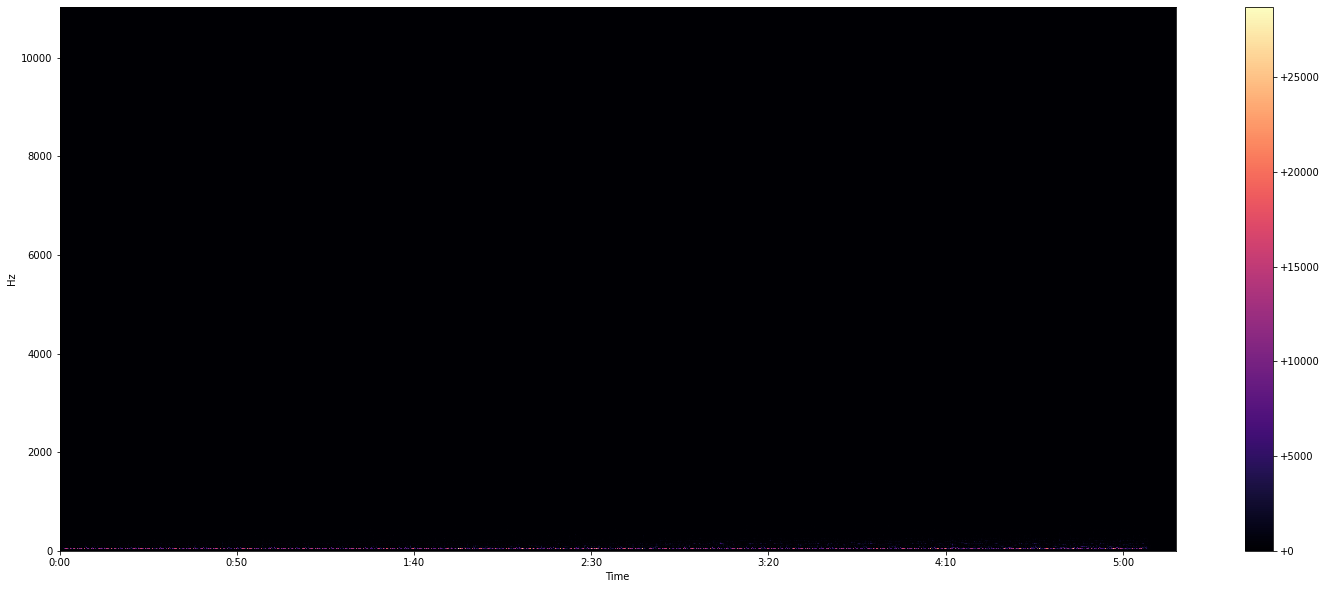

In [ ]:
plot_spectrogam(Y_scale, sr, HOP_SIZE)

**LOG-AMPLITUDE SPECTROGRAM**



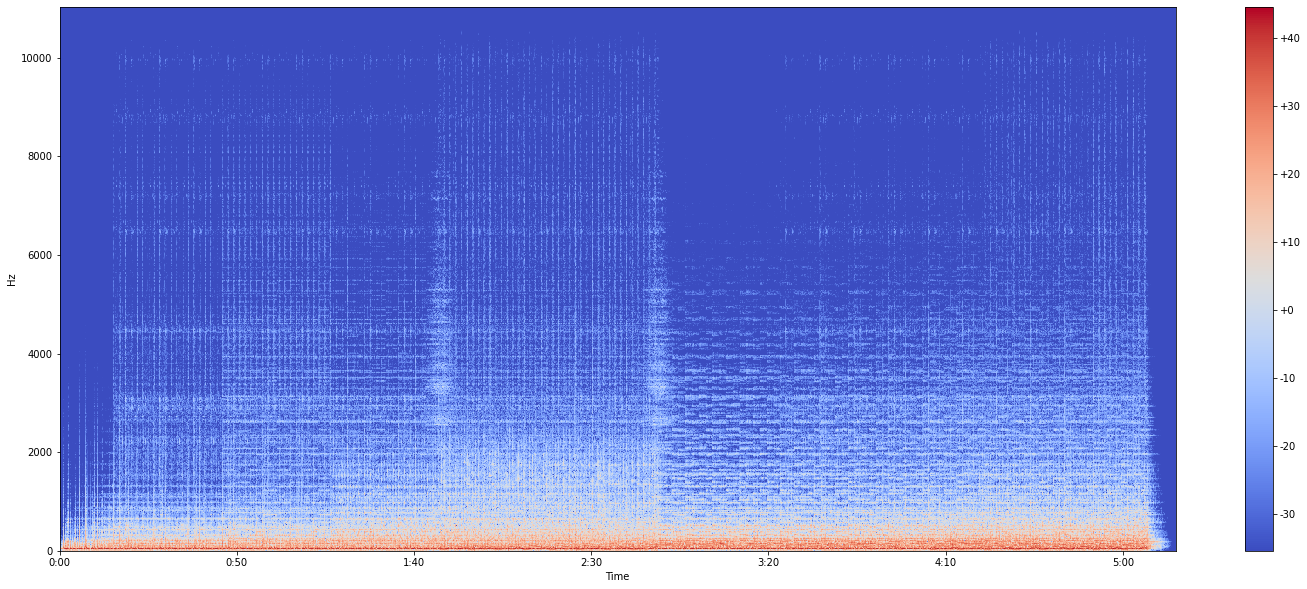

In [ ]:
Y_log_scale = librosa.power_to_db(Y_scale) #apply log transformation on amplitudes
plot_spectrogam(Y_log_scale,sr,HOP_SIZE)

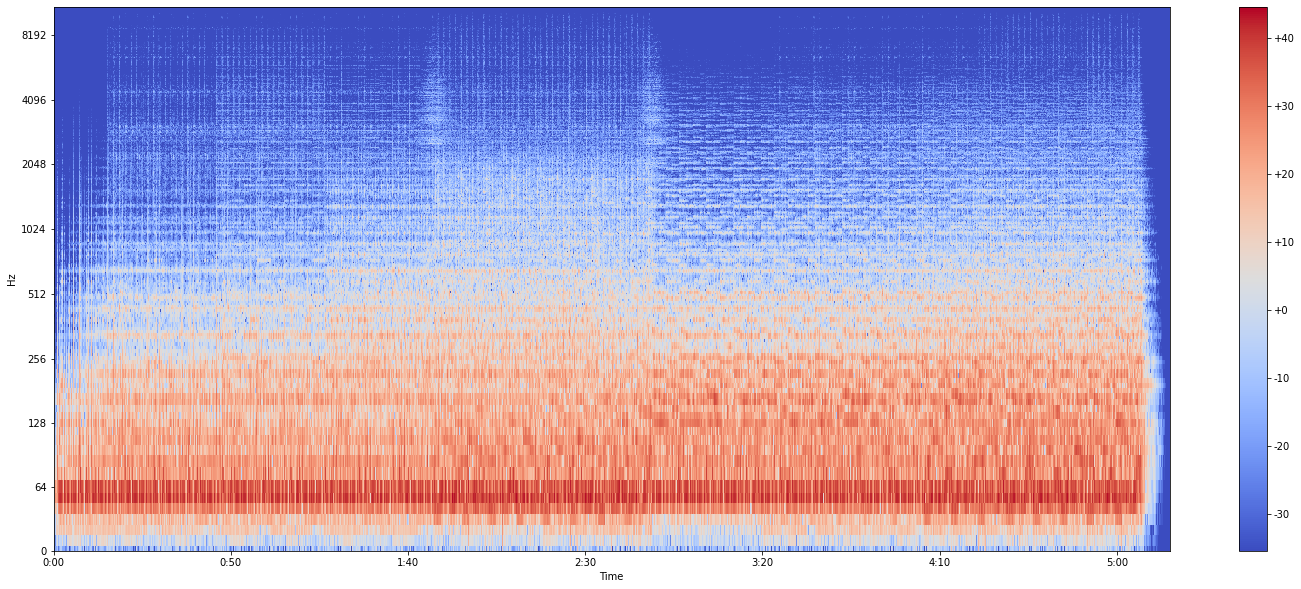

In [ ]:
plot_spectrogam(Y_log_scale, sr, HOP_SIZE, y_axis="log") #apply log transformation on frequency

**Mel filter banks**

In [ ]:
filter_banks =librosa.filters.mel(n_fft=2048, sr=22050, n_mels=10)

In [ ]:
filter_banks.shape

(10, 1025)

Ploting mel in blocks of hz. color corresponds to weight of mel band in hz. 

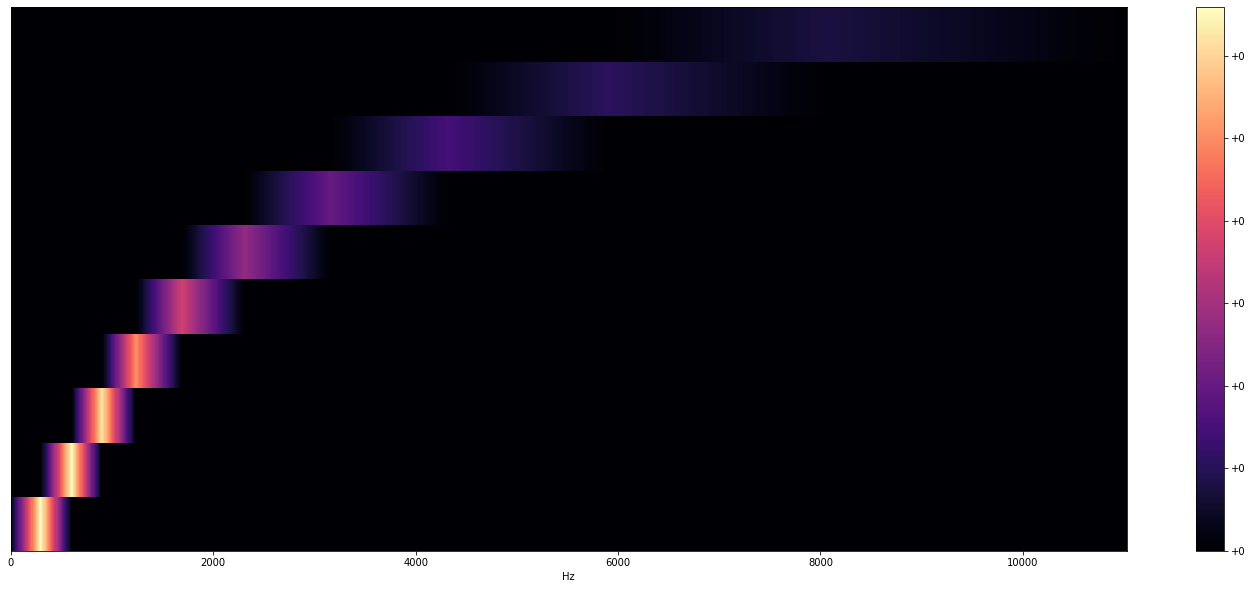

In [ ]:
plt.figure(figsize=(25,10))
librosa.display.specshow(filter_banks,
                          sr=sr,
                          x_axis='linear')
plt.colorbar(format="%+2.f")
plt.show()


**Extracting Mel Spectrobands**

In [ ]:
mel_spectrogram = librosa.feature.melspectrogram(DopWav, sr=sr, n_fft=2048, hop_length=512, n_mels=90)

bi dimentionalarray 90=number of arrays = number of mel banks, and second dimention = number of temporal bins

In [ ]:
mel_spectrogram.shape

(90, 13561)

In [ ]:
log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)

In [ ]:
log_mel_spectrogram.shape

(90, 13561)

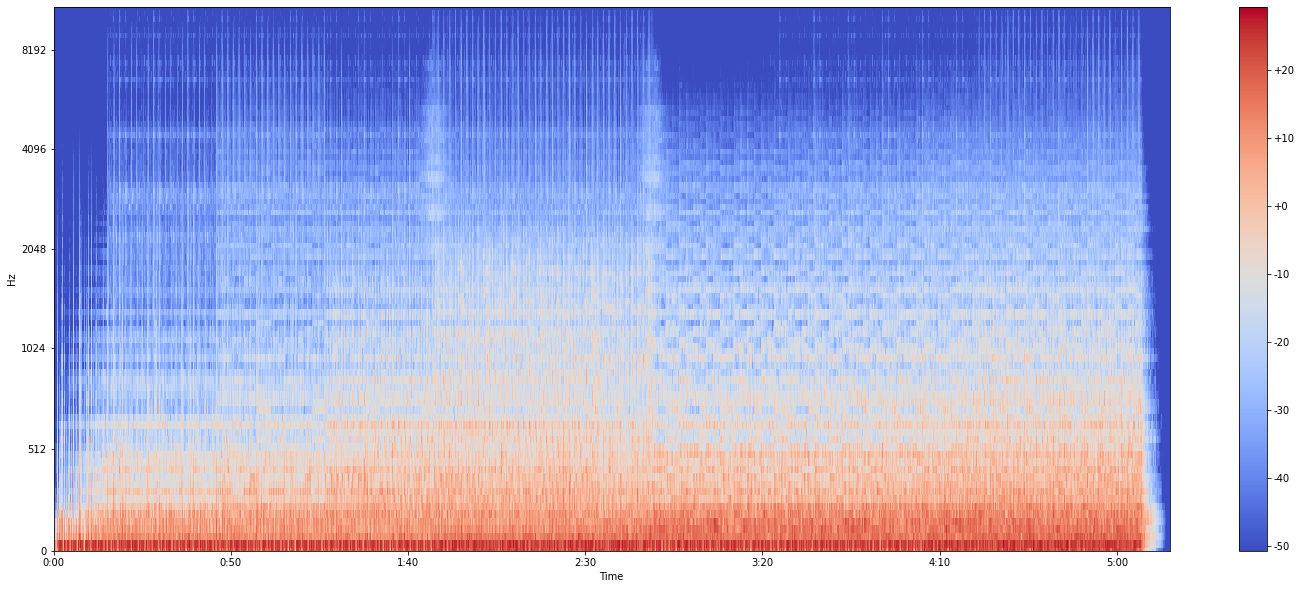

In [ ]:
plt.figure(figsize=(25,10))
librosa.display.specshow(log_mel_spectrogram, 
                         x_axis='time',
                         y_axis='mel',
                         sr=sr)
plt.colorbar(format="%+2.f")
plt.show()

**Extract spectrograms # this is done earlier as well.**

## **Calculate Energy Band Ratio**

In [ ]:
S_scale.shape

(1025, 13561)

In [ ]:
DopWav_spec_transpose =S_scale.T
DopWav_spec_transpose.shape #(time, frequency)

(13561, 1025)


##**Extract spectrograms**

In [ ]:
FRAME_SIZE = 2048
HOP_SIZE = 512
DopWav_spec = librosa.stft(DopWav, n_fft=FRAME_SIZE, hop_length=HOP_SIZE) #spectrogram

In [ ]:
DopWav_spec.shape

(1025, 13561)

In [ ]:
DopWav_spec_transpose =DopWav_spec.T
DopWav_spec_transpose.shape #(time, frequency)

(13561, 1025)

In [ ]:
def calculate_split_frequency_bin(spectrogram, split_frequency, sample_rate):
  frequency_range = sample_rate/2
  frequency_delta_per_bin = frequency_range/spectrogram.shape[0]
  split_frequency_bin = np.floor(split_frequency/frequency_delta_per_bin) #10.4->10.0, 10.9-->10.0
  return int(split_frequency_bin)


In [ ]:
split_frequency_bin = calculate_split_frequency_bin(DopWav_spec, 2000, 22050)
split_frequency_bin #2000 has been mapped on 185/1025

185

In [ ]:
def calculate_band_energy_ratio(spectrogram, split_frequency, sample_rate):
    split_frequency_bin = calculate_split_frequency_bin(spectrogram, split_frequency, sample_rate)
    
    # move to the power spectrogram
    power_spec = np.abs(spectrogram) ** 2
    power_spec = power_spec.T
    
    band_energy_ratio = []

    # calculate BER value for each frame
    for frequencies_in_frame in power_spec:
        sum_power_low_frequencies = np.sum(frequencies_in_frame[:split_frequency_bin])
        sum_power_high_frequencies = np.sum(frequencies_in_frame[split_frequency_bin:])
        ber_current_frame = sum_power_low_frequencies / sum_power_high_frequencies
        band_energy_ratio.append(ber_current_frame)
        
    return np.array(band_energy_ratio)



In [ ]:
ber_DopWav_file = calculate_band_energy_ratio(DopWav_spec, 2000, sr)

In [ ]:
ber_DopWav_file.shape

(13561,)

##**Visualize Band Energy Ratio Curves**

In [ ]:
frames = range(len(ber_DopWav_file))
t = librosa.frames_to_time(frames, hop_length=HOP_SIZE)

In [ ]:
len(t)

13561

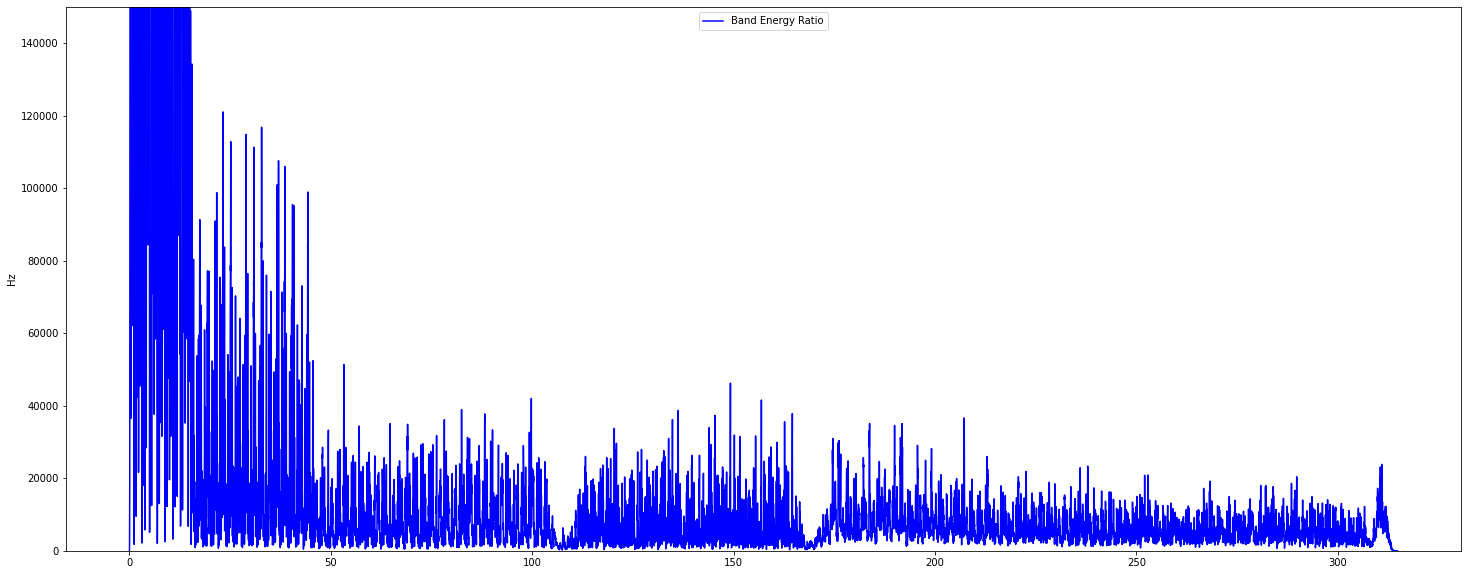

In [70]:
plt.figure(figsize=(25,10))
plt.plot(t, ber_DopWav_file, color='b')
plt.ylim((0,150000))
plt.ylabel('Hz') 
plt.legend(['Band Energy Ratio'], loc='upper center')
plt.show()

##**Spectral centroid with Librosa**

In [ ]:
FRAME_SIZE = 1024
HOP_LENGTH = 512

In [ ]:
SC_DopWav=librosa.feature.spectral_centroid(y=DopWav, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]

In [ ]:
SC_DopWav.shape


(13561,)

In [ ]:
frames =range(len(SC_DopWav))
t=librosa.frames_to_time(frames)

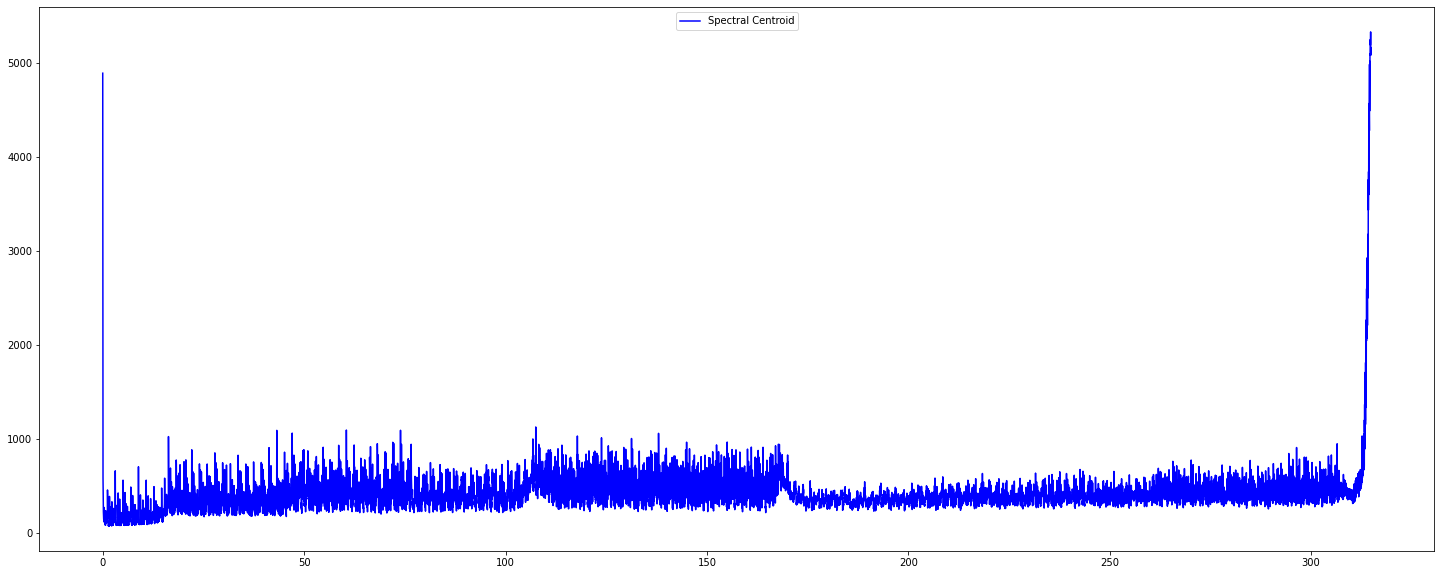

In [71]:
plt.figure(figsize=(25, 10))
plt.plot(t, SC_DopWav, color='b')
plt.legend(['Spectral Centroid'], loc='upper center')
plt.show()

In [ ]:
band_DopWav= librosa.feature.spectral_bandwidth(y=DopWav, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]

In [73]:
band_DopWav.shape

(13561,)

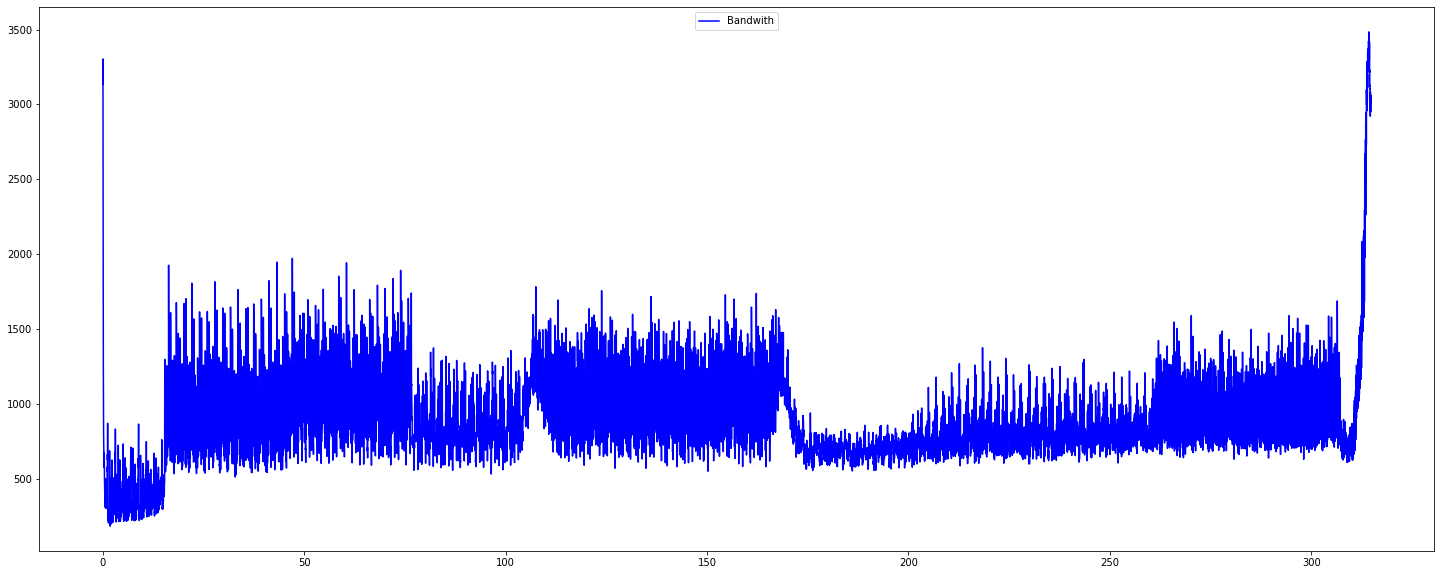

In [74]:
plt.figure(figsize=(25, 10))
plt.plot(t, band_DopWav, color='b')
plt.legend(['Bandwith'], loc='upper center')
plt.show()